# EXPLORATORY CLIMATE ANALYSIS

In [2]:
#import dependencies

In [ ]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import stats
from statistics import mean
import datetime as dt


In [3]:
import numpy as np
import pandas as pd


In [4]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


# PRECIPITATION ANALYSIS

In [28]:
from sqlalchemy import inspect,func

In [29]:
#using the inspect function to check table names and column names .
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Measurement table columns
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
#Station table columns
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [31]:
# Calculate the date 1 year ago from the last data point in the database

latest_dt =session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Latest date in database: " , latest_dt)

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("Date one year ago is: ", year_ago)


Latest date in database:  ('9/9/2016',)
Date one year ago is:  2016-08-23


In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores

m_prcp = session.query(Measurement.prcp , Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
m_prcp


[(0.01, '3/1/2010'),
 (0.04, '3/1/2010'),
 (0.01, '3/1/2010'),
 (None, '3/1/2010'),
 (0.01, '3/1/2010'),
 (0.01, '3/1/2010'),
 (0.0, '3/1/2010'),
 (0.12, '3/1/2010'),
 (0.1, '3/1/2011'),
 (0.14, '3/1/2011'),
 (0.05, '3/1/2011'),
 (None, '3/1/2011'),
 (0.02, '3/1/2011'),
 (0.18, '3/1/2011'),
 (0.03, '3/1/2011'),
 (0.0, '3/1/2011'),
 (0.22, '3/1/2011'),
 (0.06, '3/1/2012'),
 (0.0, '3/1/2012'),
 (0.0, '3/1/2012'),
 (None, '3/1/2012'),
 (0.0, '3/1/2012'),
 (0.0, '3/1/2012'),
 (0.0, '3/1/2012'),
 (0.0, '3/1/2012'),
 (0.64, '3/1/2012'),
 (0.0, '3/1/2013'),
 (0.0, '3/1/2013'),
 (0.0, '3/1/2013'),
 (0.0, '3/1/2013'),
 (0.0, '3/1/2013'),
 (0.03, '3/1/2013'),
 (0.0, '3/1/2013'),
 (0.0, '3/1/2013'),
 (0.25, '3/1/2014'),
 (0.16, '3/1/2014'),
 (0.23, '3/1/2014'),
 (0.24, '3/1/2014'),
 (0.35, '3/1/2014'),
 (0.5, '3/1/2014'),
 (0.42, '3/1/2014'),
 (0.0, '3/1/2015'),
 (0.27, '3/1/2015'),
 (None, '3/1/2015'),
 (0.02, '3/1/2015'),
 (0.18, '3/1/2015'),
 (0.12, '3/1/2015'),
 (0.0, '3/1/2016'),
 (0.0, '3/1

NameError: name 'plt' is not defined

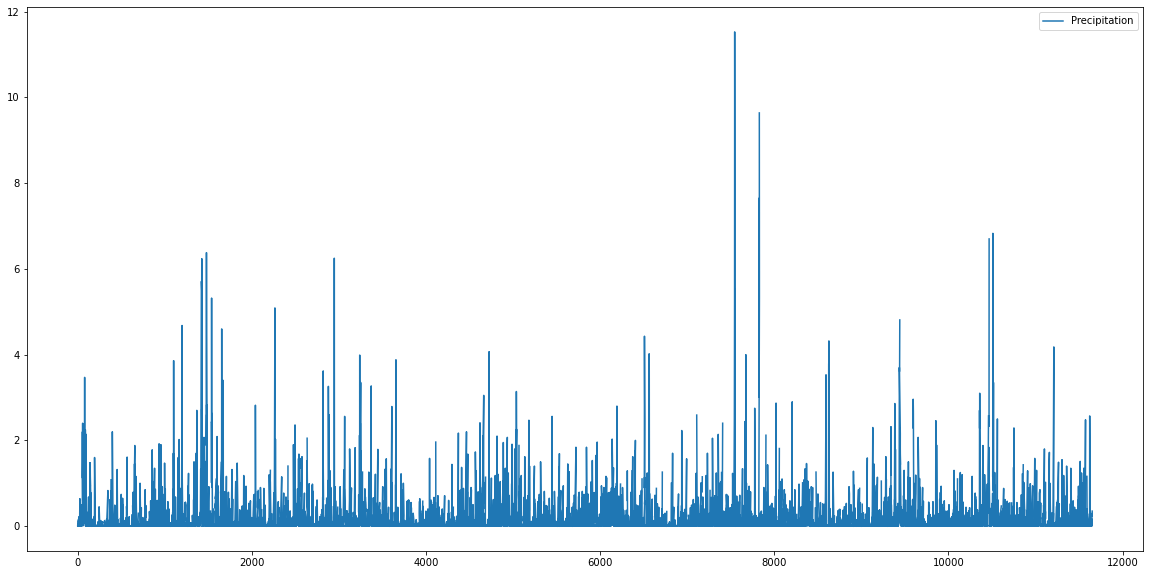

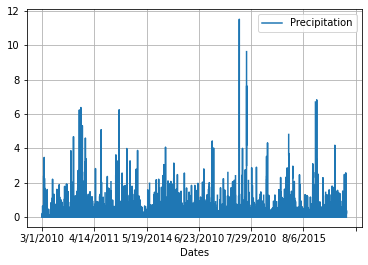

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column


df = pd.DataFrame(m_prcp, columns = ['Precipitation', 'Dates'])
df.set_index('Dates')

# Sort the dataframe by date
df_dates = df.sort_values(by = 'Dates')

#Determine the plot size
df_dates.plot(figsize=(20,10))

# Use Pandas Plotting with Matplotlib to plot the data
df_dates.plot(x = 'Dates' , grid = True)


plt.title("Bar plots showing the precipitaion recorded at all stations in 12 months" , size = 20)
plt.show()


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_dates.describe()

,Precipitation
count,10799.000000
mean,0.159282
std,0.463682
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,11.530000


# STATION ANALYSIS

In [19]:
# Design a query to show how many stations are available in this dataset?

station_m = session.query(func.count(Measurement.station)).all()
station_m


[(19550,)]

In [20]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order.
#Which station has the highest number of observations?

max_stations = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).desc()).all()

max_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temp_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                      func.avg(Measurement.tobs)).\
                      filter(Measurement.station == 'USC00519281' ).all()


print("The Minimum ,Maximum and Average Temp for the most active station is :" , temp_active_station)


The Minimum ,Maximum and Average Temp for the most active station is : [(54.0, 85.0, 71.66378066378067)]


In [22]:
# Choose the station with the highest number of temperature observations.
# Calculate the one year from the latest date recorded for 'USC00519281'

last_dt = session.query (Measurement.date).filter(Measurement.station == 'USC00519281').\
          order_by(Measurement.date.desc()).first()
print("Latest date for station 'USC00519281' is: " , last_dt )


year_ago3 = dt.date(2017, 8, 18) - dt.timedelta(days = 365)
print("Date one year ago is: ", year_ago3 )


Latest date for station 'USC00519281' is:  ('9/9/2016',)
Date one year ago is:  2016-08-18


In [23]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


resultss =  session.query(Measurement.tobs).\
                          filter(Measurement.station == 'USC00519281' ).\
                          filter(Measurement.date >= '2017,8,23').all()

resultss


[(68.0,),
 (71.0,),
 (69.0,),
 (65.0,),
 (67.0,),
 (71.0,),
 (70.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (69.0,),
 (70.0,),
 (73.0,),
 (74.0,),
 (67.0,),
 (68.0,),
 (64.0,),
 (65.0,),
 (68.0,),
 (68.0,),
 (72.0,),
 (67.0,),
 (64.0,),
 (71.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (74.0,),
 (69.0,),
 (71.0,),
 (72.0,),
 (71.0,),
 (74.0,),
 (73.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (69.0,),
 (72.0,),
 (68.0,),
 (75.0,),
 (69.0,),
 (65.0,),
 (68.0,),
 (65.0,),
 (66.0,),
 (64.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (77.0,),
 (77.0,),
 (71.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (71.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (72.0,),
 (68.0,),
 (76.0,),
 (77.0,),
 (73.0,),
 (69.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (77.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (72.0,),
 (72.0,),
 (72.0,),
 (73.0,),
 (69.0,),
 (69.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (71.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (76.0,),
 (77.0,),
 (71.0,),
 (73.0,),


In [34]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_Measurment_join=session.query(Measurement.station,func.count(Measurement.station)).\
                       group_by(Measurement.station).\
                       order_by(func.count(Measurement.station).desc()).all()
station_Measurment_join

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

results_temp=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
             filter(Measurement.station==station_Measurment_join[0][0]).all()
results_temp

[(54.0, 85.0, 71.66378066378067)]

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519397').\
    filter(Measurement.date > '2016-08-23')
df2 = pd.DataFrame(temp_obs)  

In [45]:
df2

,0,1
0,3/1/2010,70.0
1,3/2/2010,72.0
2,3/3/2010,73.0
3,3/4/2010,70.0
4,3/5/2010,71.0
...,...,...
1631,8/19/2017,79.0
1632,8/20/2017,81.0
1633,8/21/2017,81.0
1634,8/22/2017,82.0


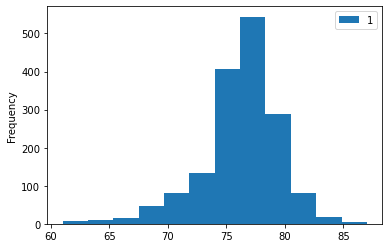

In [46]:
ax = df2.plot.hist(bins=12)

In [47]:
# Close Session
session.close()